In [1]:
function julia_set(xmin, xmax, ymin, ymax, xn, yn, c, maxiter, horizon=2.0)
    X = range(xmin, length=xn, stop=xmax)
    Y = range(ymin, length=yn, stop=ymax)
    Z = X .+ (Y')*im
    N = similar(Z, Int)
    for n = 1:maxiter
        I = abs.(Z) .< horizon
        N[I] .= n
        @. Z[I] = Z[I]^2 + c
    end
    @. N[N == maxiter] = 0
    return Z, N
end

xmin, xmax, xn = -1.75, +1.75, 3140
ymin, ymax, yn = -0.75, +0.75, 2160
c = -1.222 + (0.1995)*im
maxiter = 200
horizon = 2.0 ^ 40
log_horizon = log(log(horizon))/log(2)

Z, N = julia_set(xmin, xmax, ymin, ymax, xn, yn, c, maxiter, horizon)

(Complex{Float64}[2.48414e16+1.75623e15im 2.44273e16+1.30484e15im … 2.2649e14+2.85646e14im 2.36889e14+2.86911e14im; 2.41059e16+2.40111e15im 2.37155e16+1.95078e15im … 2.28369e14+2.6937e14im 2.3848e14+2.70273e14im; … ; 2.3848e14+2.70273e14im 2.28369e14+2.6937e14im … 2.37155e16+1.95078e15im 2.41059e16+2.40111e15im; 2.36889e14+2.86911e14im 2.2649e14+2.85646e14im … 2.44273e16+1.30484e15im 2.48414e16+1.75623e15im], [6 6 … 6 6; 6 6 … 6 6; … ; 6 6 … 6 6; 6 6 … 6 6])

In [2]:
M = zeros(xn, yn)
@. M = N + 1 - log(log(abs(Z)))/log(2) + log_horizon

M .= (M .- minimum(M)) / (maximum(M) - minimum(M))

3140×2160 Array{Float64,2}:
 0.0         4.61008e-6  9.22357e-6  …  0.00116082  0.00115489  0.00114896
 7.12129e-6  1.17384e-5  1.6359e-5      0.00117006  0.00116411  0.00115817
 1.42446e-5  1.88688e-5  2.34964e-5     0.0011793   0.00117334  0.00116739
 2.13699e-5  2.60012e-5  3.06359e-5     0.00118854  0.00118257  0.00117661
 2.84972e-5  3.31356e-5  3.77774e-5     0.00119779  0.00119181  0.00118583
 3.56266e-5  4.0272e-5   4.49209e-5  …  0.00120704  0.00120104  0.00119506
 4.27579e-5  4.74104e-5  5.20664e-5     0.00121629  0.00121029  0.00120429
 4.98912e-5  5.45508e-5  5.92139e-5     0.00122555  0.00121953  0.00121352
 5.70264e-5  6.16931e-5  6.63633e-5     0.00123481  0.00122878  0.00122276
 6.41636e-5  6.88374e-5  7.35148e-5     0.00124407  0.00123803  0.001232  
 7.13028e-5  7.59837e-5  8.06682e-5  …  0.00125334  0.00124729  0.00124124
 7.84439e-5  8.31319e-5  8.78235e-5     0.00126261  0.00125655  0.00125049
 8.55869e-5  9.02821e-5  9.49808e-5     0.00127189  0.00126581  0.001259

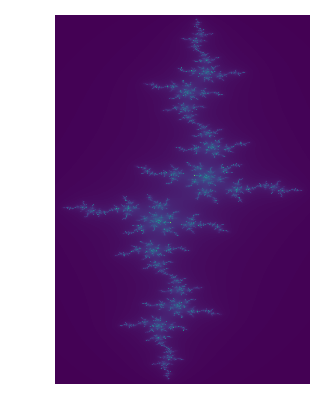

PyObject <matplotlib.image.AxesImage object at 0x70b2c59890>

In [3]:
using PyPlot

axis("off")
imshow(M)